# Ford GoBike User Analysis
## by Elizabeth Blank

## Preliminary Wrangling

> This document explores a dataset containing trip data from some 1.8 million Ford GoBike users. 

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime
import statistics

%matplotlib inline

In [11]:
# load data
path = r'C:\Users\lblank\Documents\Personal\Data Analyst Nanodegree\GoBike_DataVis\data'
files = glob.glob(os.path.join(path, '*.csv'))
master = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

In [12]:
print(master.shape)
print(master.dtypes)
master.head(5)

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [13]:
master.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [14]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


### What is the structure of your dataset?
This dataset contains 1,863,721 survey responses regarding 16 trip attributes. Variables of interest include member gender (categorical), start time (object), member birth year (integer), user type (member or customer, categorical), and Bike Share for All membership status (categorical). The initial 1,863,721 observations was cut down to 1,670,060 after cleaning.

### What is/are the main feature(s) of interest in your dataset?

Im interested in figuring out which features are the biggest predictors of membership status, and which features best describe our most frequent users. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the greatest predictors of frequent usership to be membership status, followed by day of the week and age to a slightly lesser degree.

In [15]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


## Cleaning
* Drop rows w/ na
* correct variable types: member_gender, bike_share_for_all_trip and user_type as categoricals, start_time and end_time as datetimes, and bike_id, start_station_id and end_station_id as objects
* calculate age variable
* remove outliers from age column

In [16]:
clean = master.copy()

In [17]:
clean.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [18]:
clean.dropna(axis=0,inplace=True)

In [19]:
clean['member_birth_year']= clean.member_birth_year.astype(str).str[:-2].astype(int)

In [20]:
clean['age'] = 2019-clean.member_birth_year

In [21]:
clean.age.describe()

count    1.741556e+06
mean     3.593921e+01
std      1.045133e+01
min      1.900000e+01
25%      2.800000e+01
50%      3.400000e+01
75%      4.100000e+01
max      1.380000e+02
Name: age, dtype: float64

In [22]:
clean.age.describe(percentiles=[.98])

count    1.741556e+06
mean     3.593921e+01
std      1.045133e+01
min      1.900000e+01
50%      3.400000e+01
98%      6.200000e+01
max      1.380000e+02
Name: age, dtype: float64

In [23]:
clean.loc[clean['member_birth_year']==1886, 'member_birth_year'] = 1986
clean.loc[clean['member_birth_year']==1900, 'member_birth_year'] = 2000
clean.drop(clean[clean['age']>61].index, inplace=True)

In [24]:
clean.member_gender = clean.member_gender.astype('category')
clean.bike_share_for_all_trip = clean.bike_share_for_all_trip.astype('category')
clean.user_type = clean.user_type.astype('category')
clean.bike_id = clean.bike_id.astype(str)
clean.start_time = pd.to_datetime(clean.start_time)
clean.end_time = pd.to_datetime(clean.end_time)
clean['month'] = clean['start_time'].dt.strftime('%B')
clean['start_day'] = clean['start_time'].dt.strftime('%a')
clean['month_num'] = clean['start_time'].dt.month.astype(int)
clean['day_num']= clean['start_time'].dt.strftime('%w').astype(int)
clean['hour'] = clean['start_time'].dt.strftime('%H').astype(int)
clean['daytime'] = clean['start_time'].dt.strftime('%p').astype('category')

## Univariate Exploration


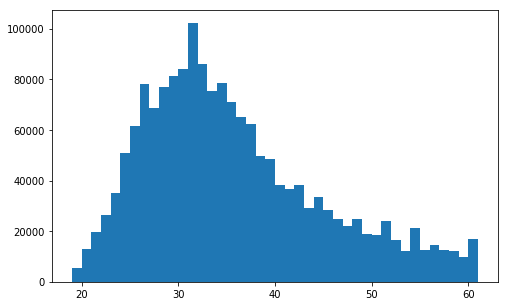

In [25]:
plt.figure(figsize=[8,5]);
g=plt.hist(data=clean, x='age',bins=42);

From this histogram we can see that age is strongly right-skewed. I'm going to put it on a log scale so we can get a better picture of its distribution.

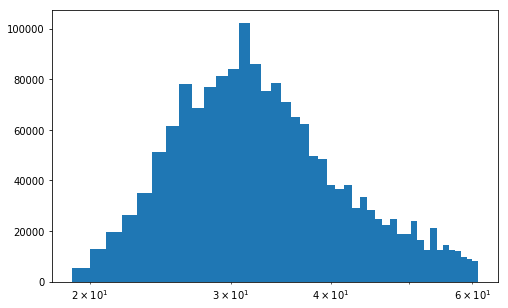

In [26]:
plt.figure(figsize=[8,5]);
g=plt.hist(data=clean, x='age',bins=43);
plt.xscale('log');

In [27]:
clean.reset_index();

Plotted on a log scale, age looks nearly normal, with the highest concentration of users around 31 years old. Leading up to age 30 we see pretty steep increases in user count, followed by a more gradual decline leading up to the 60 year mark.

In [28]:
clean['age_log'] = np.log(clean.age)

Now going to look at subscriber status.

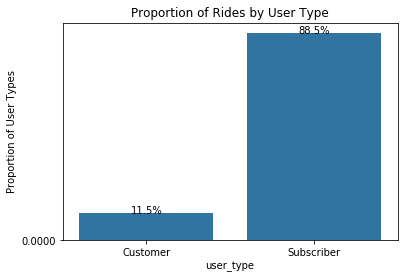

In [29]:
sb.countplot(data=clean,x= 'user_type');
n_obs = clean.shape[0]
max_count = clean.user_type.value_counts().max()
max_prop = max_count/n_obs
tick_props= np.arange(0, max_prop, 1)
tick_names = ['{:0.4f}'.format(v) for v in tick_props]
base_color = sb.color_palette()[0]
g = sb.countplot(data=clean, x='user_type', color=base_color)
plt.yticks(tick_props*n_obs, tick_names)
plt.ylabel('Proportion of User Types')
locs, labels = plt.xticks()
user_counts = clean['user_type'].value_counts()
plt.title('Proportion of Rides by User Type')
## add labels
for loc, label in zip(locs, labels):

    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_obs)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha='center',color = 'black')

Wow, that's a very high subscriber rate. So, our average member is not a spontaneous, recreational rider. It's preliminary, but I'm going to bet most who use this service are work commuters. 

Now, what's the duration of a typical ride?

In [30]:
clean['minutes'] = clean.duration_sec/60

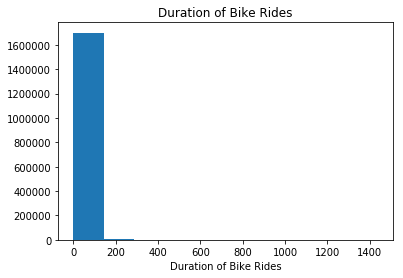

In [31]:
plt.hist(data=clean, x='minutes');
plt.title('Duration of Bike Rides');
plt.xlabel('Duration of Bike Rides');

There must be some serious outliers if we're getting this distribution.

In [32]:
clean.minutes.max()

1438.0166666666667

Ouch. Looks like someone's GoBike rental may have been taken on a 1400 minute joyride. Let me see what our distribution looks like.

In [33]:
clean.minutes.describe(percentiles=[.98])

count    1.704912e+06
mean     1.286956e+01
std      3.239719e+01
min      1.016667e+00
50%      9.033333e+00
98%      4.143333e+01
max      1.438017e+03
Name: minutes, dtype: float64

So, 98% of rides are completed within forty minutes, making anything above that a good cutoff point for removing outliers.

In [34]:
clean.drop(clean[clean['minutes']>41].index, inplace=True)

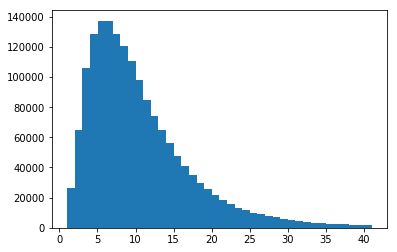

In [35]:
plt.hist(data=clean, x='minutes', bins=40);

Much, much better. Since this is still highly skewed, though, I'm going to plot the minutes on a log scale. 

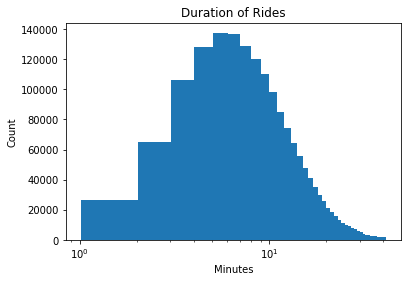

In [36]:
plt.hist(data=clean, x='minutes', bins=40);
plt.xscale('log');
plt.title('Duration of Rides');
plt.ylabel('Count');
plt.xlabel('Minutes');

A couple things from this graph and the description above: 75% of rides last less than 13 minutes and the median number of minutes is 8, which means most people are probably traveling a couple miles or less. So, one feature that describes our most frequent users: short ride duration.

In [37]:
clean['minutes_log'] = np.log(clean.minutes)

Now going to look at days of the week.

In [38]:
clean = clean.reset_index()
clean.drop('index', axis=1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,age,month,start_day,month_num,day_num,hour,daytime,age_log,minutes,minutes_log
0,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,31,January,Wed,1,3,23,PM,3.433987,7.550000,2.021548
1,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,39,January,Wed,1,3,23,PM,3.663562,3.000000,1.098612
2,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,...,32,January,Wed,1,3,23,PM,3.465736,16.600000,2.809403
3,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,...,25,January,Wed,1,3,23,PM,3.218876,13.750000,2.621039
4,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,89.0,Division St at Potrero Ave,37.769218,-122.407646,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,26,January,Wed,1,3,23,PM,3.258097,7.200000,1.974081
5,887,2018-01-31 23:24:16.357,2018-01-31 23:39:04.123,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,43,January,Wed,1,3,23,PM,3.761200,14.783333,2.693500
6,210,2018-01-31 23:33:03.046,2018-01-31 23:36:33.704,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,186.0,Lakeside Dr at 14th St,37.801319,...,43,January,Wed,1,3,23,PM,3.761200,3.500000,1.252763
7,188,2018-01-31 23:30:58.136,2018-01-31 23:34:06.391,98.0,Valencia St at 16th St,37.765052,-122.421866,76.0,McCoppin St at Valencia St,37.771662,...,55,January,Wed,1,3,23,PM,4.007333,3.133333,1.142097
8,808,2018-01-31 23:19:58.603,2018-01-31 23:33:27.531,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,98.0,Valencia St at 16th St,37.765052,...,43,January,Wed,1,3,23,PM,3.761200,13.466667,2.600217
9,378,2018-01-31 23:23:23.068,2018-01-31 23:29:42.044,80.0,Townsend St at 5th St,37.775306,-122.397380,78.0,Folsom St at 9th St,37.773717,...,24,January,Wed,1,3,23,PM,3.178054,6.300000,1.840550


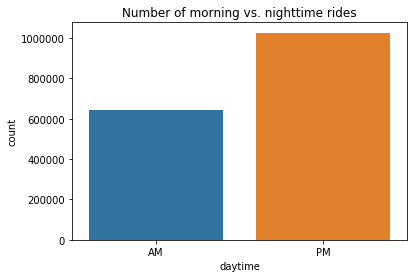

In [39]:
sb.countplot(data=clean, x='daytime');
plt.title('Number of morning vs. nighttime rides');

Unsurprisingly, there are quite a bit more PM rides logged than AM considering how few people go bike-riding in the middle of the night. This doesn't tell me much.

I want to get a better picture of when exactly people are riding. I'll do a count plot by hour of day.

In [40]:
clean.hour = clean.hour.astype(int)

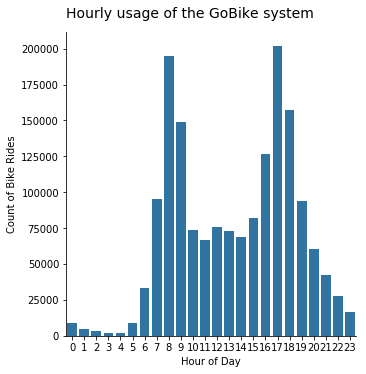

In [41]:
g = sb.catplot(data=clean, x='hour', kind='count', color = base_color);
g.set_axis_labels("Hour of Day", "Count of Bike Rides");
g.fig.suptitle('Hourly usage of the GoBike system', y=1.03, fontsize=14);

This is much more telling than the AM/PM graph. We can see a bimodal distribution that appears to peak around the time when people are heading into and leaving work, ~8 and ~5, respectively. So, we are definitely looking at a majority of commuters here. 

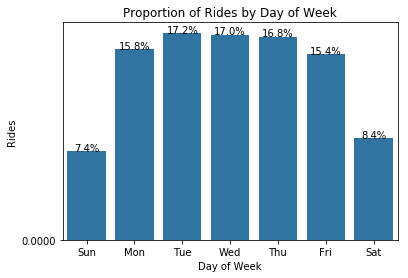

In [42]:
clean.start_day = pd.Categorical(clean['start_day'], categories = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ordered = True)
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
max_count = clean.start_day.value_counts().max()
max_prop = max_count/n_obs
tick_props_sd = np.arange(0, max_prop, 1)
tick_names_sd = ['{:0.4f}'.format(v) for v in tick_props]
g = sb.countplot(data=clean, x='start_day', order = days, color = base_color);
plt.yticks(tick_props_sd*n_obs, tick_names_sd)
plt.xlabel('Day of Week');
plt.ylabel('Rides')
locs, labels = plt.xticks();
day_counts = clean['start_day'].value_counts()
plt.title('Proportion of Rides by Day of Week')
## add labels
for loc, label in zip(locs, labels):

    count = day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_obs)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha='center',color = 'black')


We can see that the vast majority of our rides occur during the week. There seems to be little fluctuation between the weekday and weekend proportions, respectively, even further evidence that we're looking at a commuter market. Segue, I like how on Mondays and Fridays, the weekend-cushions, we see a little dip in rides. People transitioning to and from their two days of taking it easy.

Moving on, I want to know what kind of effect gender has on ride frequency. 

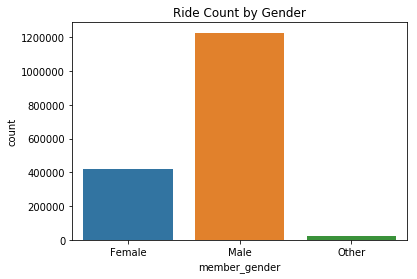

In [43]:
sb.countplot(data=clean, x='member_gender');
plt.title('Ride Count by Gender');

In [44]:
print(len(clean.query('member_gender == "Male"'))/clean.shape[0])
print(len(clean.query('member_gender == "Female"'))/clean.shape[0])
print(len(clean.query('member_gender == "Other"'))/clean.shape[0])

0.7346400728117553
0.24995688777648709
0.015403039411757661


Wow! I did not expect gender to be so disparate. Men account for three times more rides than women.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Since age is continuous and has a long right tail, I plotted the log transform of it. Most users were around 31, and the vast majority were under 40. 

I created a minutes variable for a clearer picture of the ride durations, and since it also had a long right tail, I plotted its log transform as well. Most rides lasted around 8 minutes, and 75% were under 13 minutes. Overall, we're seeing very short rides. 

One thing I did not expect to have such a huge impact on ride frequency was gender-- specifically, that men account for almost 75% of our rides. This could be for a lot of reasons. For example, women commuting to work often carry purses and wear skirts/dresses/more fitted clothing, none of which pairs well with bikes. Unfortunately we don't have the data to look more into why women ride less, but we can tell for sure that they do.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did some feature engineering so I could look at things like age, day of the week, hour, and AM/PM status. to create age I just subtracted the birth year listed from 2019. I used strftime() to extract everything else I listed from the start_time variable. Day of the week and am/pm status were saved as categorical variables (day of the week as an ordered categorical), and hour and month number were saved as integers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [45]:
clean.columns

Index(['index', 'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'month', 'start_day', 'month_num', 'day_num', 'hour', 'daytime',
       'age_log', 'minutes', 'minutes_log'],
      dtype='object')

In [46]:
numeric_vars = ['duration_sec', 'age', 'age_log', 'month_num', 'day_num', 'hour', 'start_station_latitude', 'end_station_latitude']
categoric_vars = ['start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all', 'daytime']

First, I'm going to make a bunch of plots comparing my numeric variables to see if there are any clear relationships. 

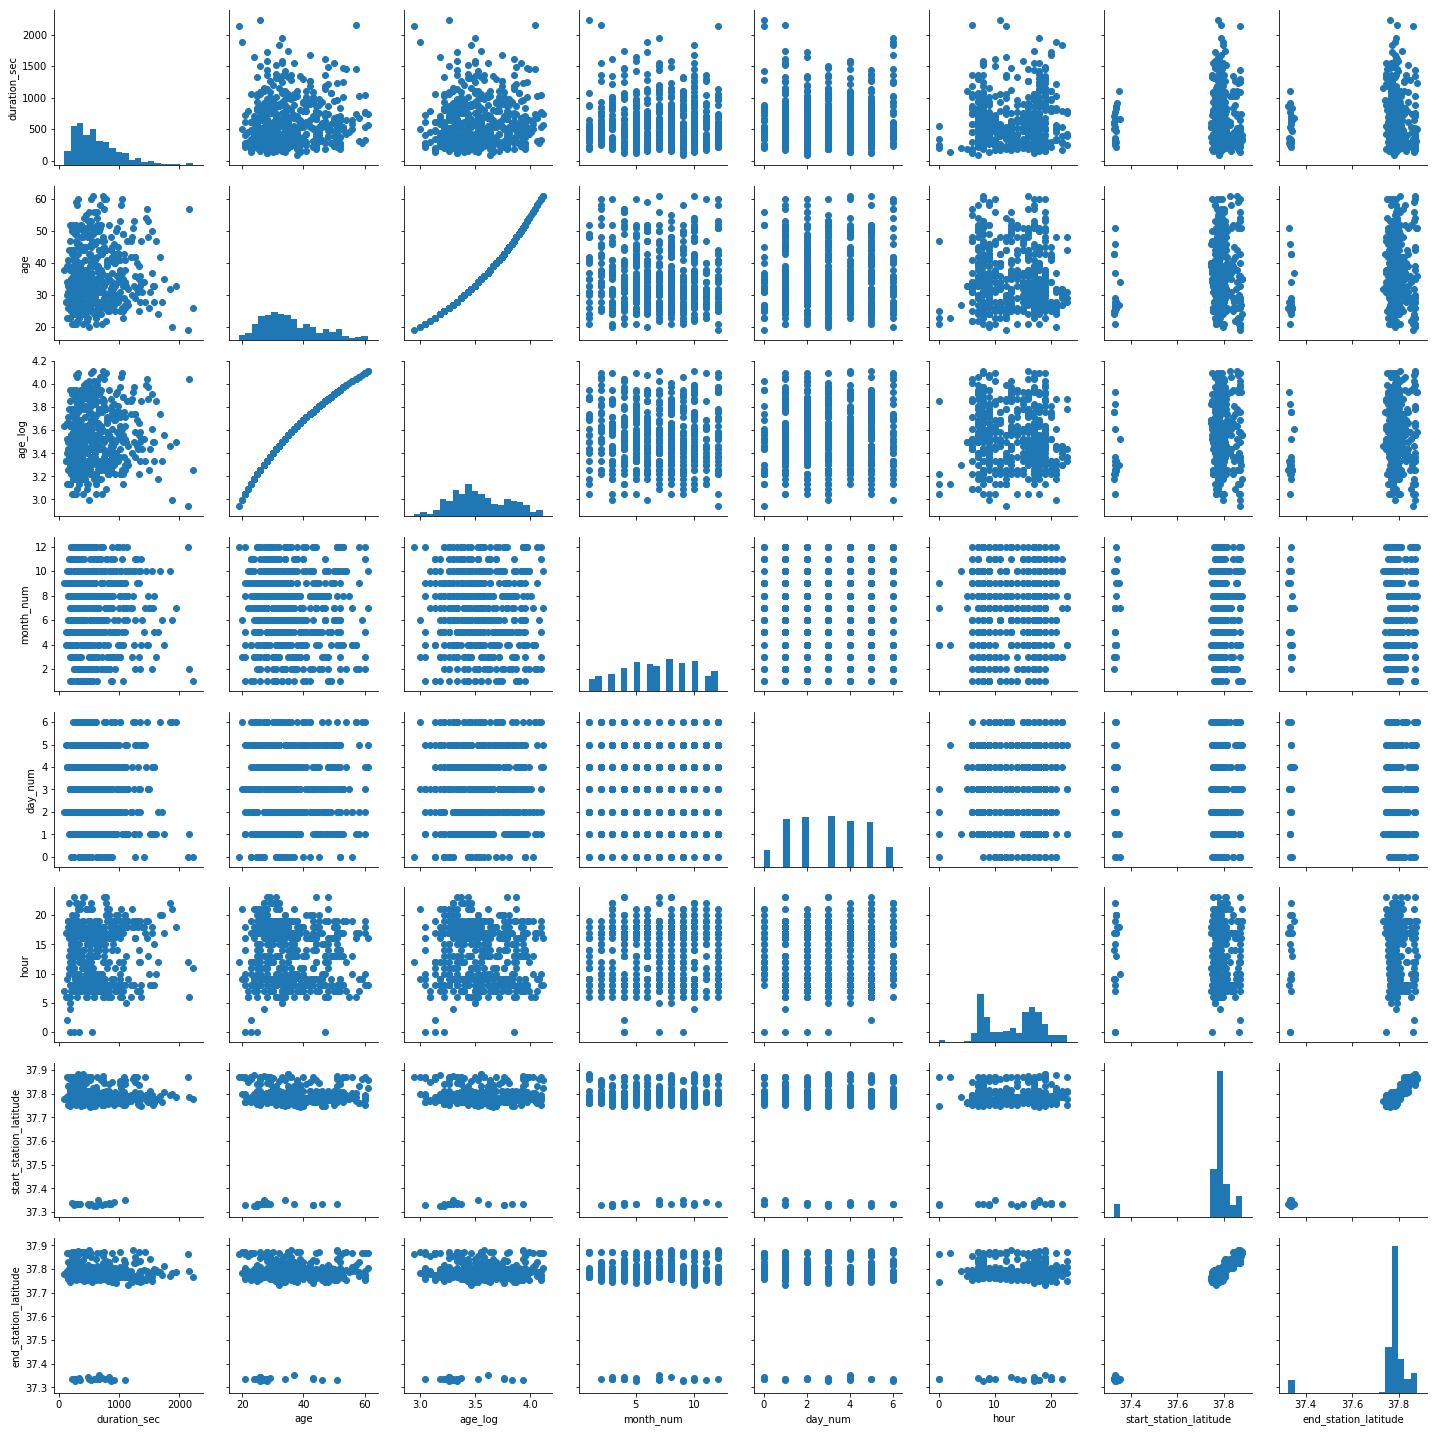

In [47]:
samples = np.random.choice(clean.shape[0], 500, replace = False)
clean_samp = clean.loc[samples,:]

g = sb.PairGrid(data = clean_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

This really doesn't tell me much. Besides start and end station latitudes, which I'm not super interested in, I don't see any  overtly meaningful relationships. 

I want to look at whether peak hours change on the weekends when most of our riders should be off work.

I'm going to use np.where to make a new dummy variable, weekend: any week day numbers less than 5 (i.e. Monday to Friday) will 0, and weekends will be 1. 

In [48]:
clean['weekend'] = np.where(clean['day_num'] < 5, 0, 1)

In [49]:
clean.weekend = clean.weekend.astype('category')

C:\Users\lblank\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


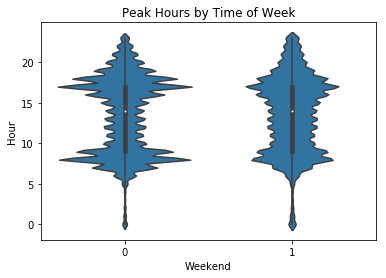

In [50]:
sb.violinplot(data=clean, x='weekend', y='hour', color = base_color);
plt.title('Peak Hours by Time of Week');
plt.xlabel('Weekend');
plt.ylabel('Hour');

Well, this is boring. Besides the fact that weekdays are much busier, there's no discernible difference between peak hours on weekends vs. weekdays.

Now I'm going to look at the age range by user type. I'm expecting the age range to be lower for Customers because their income is generally lower and according to the age histogram they tend to ride less frequently.

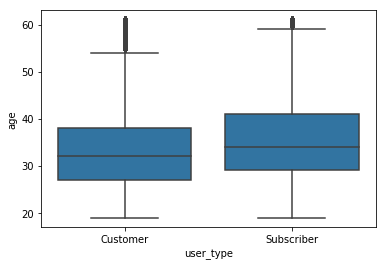

In [51]:
sb.boxplot(data=clean, x='user_type', y='age', color = base_color);

This graph tells us a few things. First, there's very little difference between the average age of the user types. We do see that the interquartile range for Customer is skewed a little bit younger than Subscriber, which could be for a few reasons. More to the point, the age distribution of all riders is most heavily concentrated between those around 25-40, which, according to BLS (https://www.bls.gov/emp/tables/civilian-labor-force-participation-rate.htm), happens to be the age group with the highest labor force participation rate. 

I want to dig into age a little more. The bike_share_for_all_trip variable allows people with financial need to get a membership at a much lower rate. I'm assuming this group will primarily consist of young people (<30).

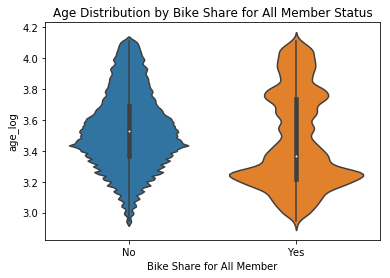

In [52]:
sb.violinplot(data=clean, x='bike_share_for_all_trip', y='age_log');
plt.title('Age Distribution by Bike Share for All Member Status');
plt.xlabel('Bike Share for All Member');

The mean age for Bike Share members seems to be a little bit lower (1-2 years), but not significantly. Both hover around 33 mark. The range for nonmembers is smaller and normally distributed, but even with the log scale the member group has a very strong right skew. This group is dominated by younger people, no doubt. 

I want to check one more age relationship, this time with Bike Share for All members. I would expect their ages to be lower, on average, because younger people are more likely to have lower incomes.

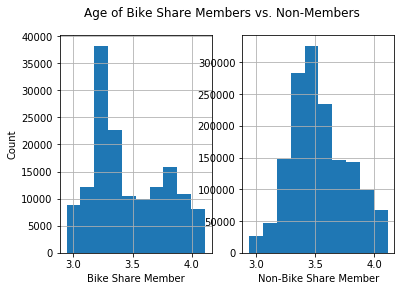

In [53]:
plt.subplot(1,2,1)
clean.query('bike_share_for_all_trip=="Yes"')['age_log'].hist();
plt.xlabel('Bike Share Member');
plt.ylabel('Count');
plt.subplot(1,2,2)
clean.query('bike_share_for_all_trip=="No"')['age_log'].hist();
plt.xlabel('Non-Bike Share Member');
plt.suptitle('Age of Bike Share Members vs. Non-Members');

This is different-- we see a nearly normal unimodal distribution for non-members of the Bike Share program. Members, however, follow a totally different trend. Here we see a bimodal distribution peaking around ages 32 and age 38. What interests me is also what happens around age 35: non-Bike Share members hit their peak, while at that same age Bike Share members are nearly at their nadir. At the very least, this tells me that these are to distinct audiences and their respective attributes may be worth looking into. 

Moving on, I'm going to look at day of the week by user type to see if there's a difference in their distributions.

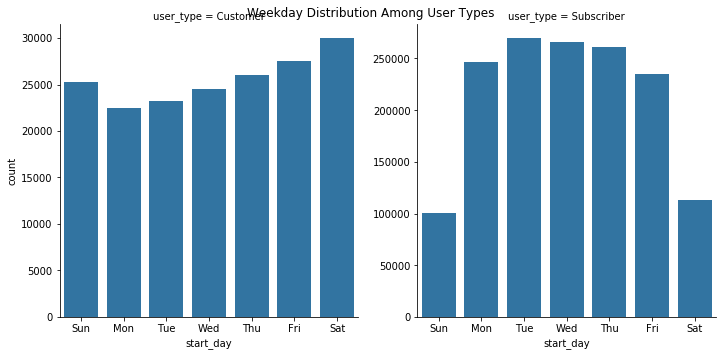

In [54]:
sb.catplot(data=clean, x='start_day', col='user_type', kind='count', sharey=False, color=base_color, order =days);
plt.suptitle('Weekday Distribution Among User Types');

Again, not too surprising. I think we can safely assume now that most subscribers are commuters. Considering weekends are the busiest time for the Customer user type, I'm thinking they lean recreational, but it's more than likely a mixed-bag situation in that group-- some recreational, some spontaneous commmuting-- based on the spread. 

Now, let's check out monthly usage by user type. I would expect Subscribers to have less variance in their ride frequency than Customers. 

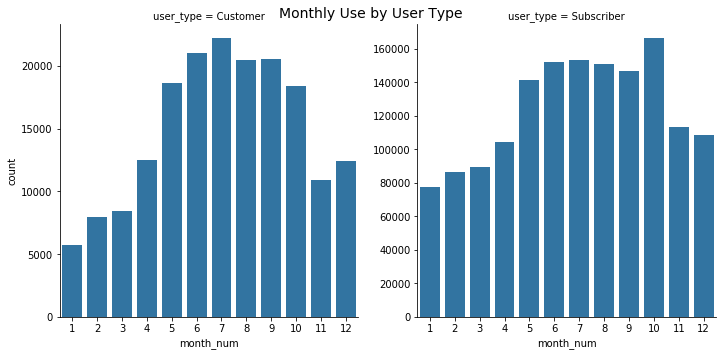

In [55]:
sb.catplot(data=clean, x='month_num', col='user_type', kind='count', sharey=False, color = base_color);
plt.suptitle('Monthly Use by User Type', fontsize=14);

Okay, so both subscribers and customers ride less during the winter. This is to be expected. That being said, we do see more consistency with those who are members; their rates aren't as volatile. Side note, I wonder if the uptick for Customer rides in May-October could be due to tourism. 

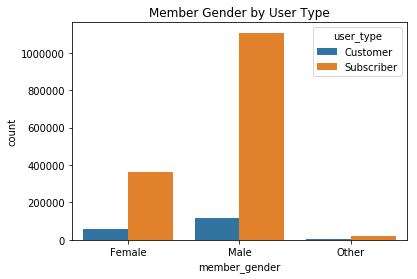

In [56]:
g1 = sb.countplot(data=clean, x='member_gender', hue='user_type');
plt.title('Member Gender by User Type');

We can see from this that male subscribers are accounting for the vast majority of all rides. However, since this is followed by female subscribers and not male customers, we can assert that **subscriber status** is a likely stronger predictor of ride frequency than gender is. So far, these are looking like the two biggest factors in ride frequency. 

I want to see if there's a different gender distribution amongst Bike Share for All members.

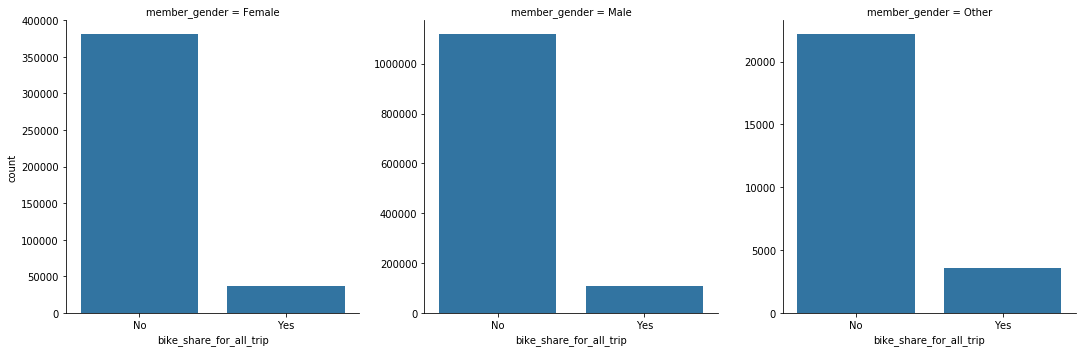

In [57]:
sb.catplot(data=clean, x='bike_share_for_all_trip', col='member_gender', kind='count', sharey=False, color = base_color);

In [58]:
print(len(clean[(clean['member_gender']=="Male") & (clean['user_type']=="Subscriber")])/len(clean.query('user_type=="Subscriber"')))
print(len(clean[(clean['member_gender']=="Female") & (clean['user_type']=="Subscriber")])/len(clean.query('user_type=="Subscriber"')))
print(len(clean[(clean['member_gender']=="Other") & (clean['user_type']=="Subscriber")])/len(clean.query('user_type=="Subscriber"')))

0.7426327381399491
0.24256231824961638
0.014804943610434483


This is interesting. The bar chart makes it hard to tell the relative proportions of each gender's participation in the Bike Share program, but the proportions above make it clear. Between men and women there is no discernible difference in program participation (9% respectively), but those who identify as "other" show a rate that's almost 40% higher than the other two, at 14%. 

 ### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of  interest vary with other features in the dataset?

So, we already know that membership status is a large factor in ride frequency, as well as day of the week. When we look at these together, things get interesting. We see that among Customers, there's a much more normal distribution of rides throughout the week. Subscribers, however, are doing the vast majority of their rides on weekdays; there's a serious drop off on weekends.

We also saw that membership status interacted with month in an interesting way. It seems even members aren't immune to the cold-- there's a drop in frequency from both groups during winter months. But still, members do show more consistent use in every single month, which is further proof of membership's leading effect on ride frequency.

I was expecting to see a difference in the distribution of ages between Customers and Subscribers, but it was pretty insignificant. However, there was a slight relationship between age and Bike Share for All status. The Bike Share member group distribution was highly skewed to the right, with the vast majority of members around 32 years old. Overall, though, people's age really doesn't seem to have a large bearing on ride frequency.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There was an interesting relationship observed between member gender and Bike Share for All membership. Those who identify with a nontraditional gender type are 40% more likely to be part of the Bike Share program. I guess this shouldn't come as a surprise-- it's widely known that those who don't identify with a conventional gender type are much more likely to face discrimination in the workplace, and often have lower salaries and more trouble finding employment. 



## Multivariate Exploration


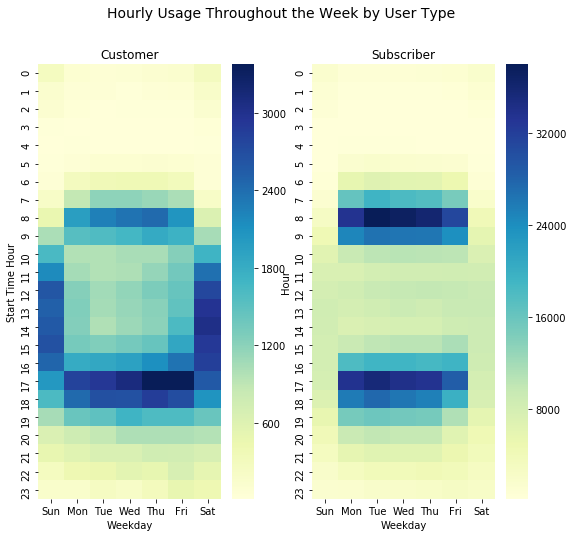

In [59]:
plt.figure(figsize=(9,8));
plt.suptitle('Hourly Usage Throughout the Week by User Type', fontsize=14);

## heatmap for customers
plt.subplot(1,2,1);
df_customer = clean.query('user_type == "Customer"').groupby(["hour", "start_day"])["bike_id"].size().reset_index();
df_customer = df_customer.pivot("hour", "start_day", "bike_id");
sb.heatmap(df_customer, cmap="YlGnBu")

plt.title("Customer", y=1.015);
plt.xlabel('Weekday');
plt.ylabel('Start Time Hour');

## heatmap for subscribers
plt.subplot(1,2,2)
df_subscriber = clean.query('user_type =="Subscriber"').groupby(['hour', 'start_day'])['bike_id'].size().reset_index()
df_subscriber = df_subscriber.pivot('hour', 'start_day', 'bike_id')
sb.heatmap(df_subscriber, cmap="YlGnBu")

plt.title('Subscriber', y=1.015);
plt.xlabel('Weekday');
plt.ylabel('Hour');

This is very telling. We can see that for those with a membership use is frequent and consistent, with peaks during the morning and evening work-rush. For customers, it's much less so (understandably). Use is much more scattered throughout the week. Customers are much more likely than Subscribers to take weekend trips. It looks to me like the Customer graph consists of some people who ride for work (hence all the ~8 and ~5 trips on weekdays), and some who ride for fun (thick spread across the weekend). Overall, this group is more heterogeneous than the Subscriber group.

Finally, I'm going to look at whether the hours vary amongst the two types of subscribers (regular vs. Bike Share for All).

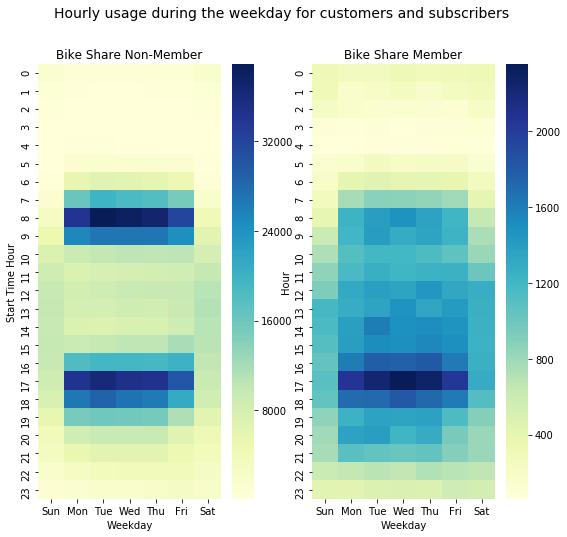

In [60]:
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14)

## heatmap for customers
plt.subplot(1,2,1)
df_bsfa_no = clean.query('bike_share_for_all_trip == "No"').groupby(["hour", "start_day"])["bike_id"].size().reset_index()
df_bsfa_no = df_bsfa_no.pivot("hour", "start_day", "bike_id")
sb.heatmap(df_bsfa_no, cmap="YlGnBu")

plt.title("Bike Share Non-Member", y=1.015);
plt.xlabel('Weekday');
plt.ylabel('Start Time Hour');

## heatmap for subscribers
plt.subplot(1,2,2)
df_bsfa_yes = clean.query('bike_share_for_all_trip =="Yes"').groupby(['hour', 'start_day'])['bike_id'].size().reset_index()
df_bsfa_yes = df_bsfa_yes.pivot('hour', 'start_day', 'bike_id')
sb.heatmap(df_bsfa_yes, cmap="YlGnBu")

plt.title('Bike Share Member', y=1.015);
plt.xlabel('Weekday');
plt.ylabel('Hour');

Big disparity! So, we can see from this that we have two very different types of subscribers: the typical and the atypical. Non-bike share members who have subscriptions tend to ride in regular intervals, i.e. to and from work. Bike share members follow a different pattern, a highly scattered pattern. Since bike share memberships are granted on a need-basis, these are likely not salaried workers. It would make sense that their hours wouldn't follow the typical 8/9-5 workday that we see with subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For my first multivariate plot I wanted to check the impact of user type (categorical) on riders' hourly and weekly usage (both discrete). This makes it clear that Subscribers follow a pattern of use that indicates most of them are commuters, while Customers' use is spread out primarily amongst nights and weekends, indicating they tend to ride recreationally.

### Were there any interesting or surprising interactions between features?

The second plot in this section assesses the impact of Subscriber subtype (regular or Bike Share for All) on ridres' hourly and weekly usage (again, discrete). I wasn't expecting to see such a disparity between the subtypes. We see a very pronounced difference between these groups, which I assume to be due to the nature of their work schedules. Among regular Subscribers there was little variance: the vast majority of rides took place on weekdays around 8 am and 5pm. This is a typical schedule for salaried workers. For Bike Share members, we see way more variability. Hours appear to be spread throughout the day on most days, with a slight decrease on weekends. This would be expected amongst those who are not working a typical 9-5, which often spells hourly or intermittent work.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [61]:
https://stackoverflow.com/questions/2186525/how-to-use-glob-to-find-files-recursively

SyntaxError: invalid syntax (<ipython-input-61-45aa38c58731>, line 1)

Link to view accompanying slide show: 

file:///C:/Users/lblank/Documents/Personal/Data%20Analyst%20Nanodegree/GoBike_DataVis/slide_deck.slides.html#/